**Sigmoid** **Neuron**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [4]:
sigmoid(1, 0.5, 0)

0.6224593312018546

**2D** **Plot** **:**

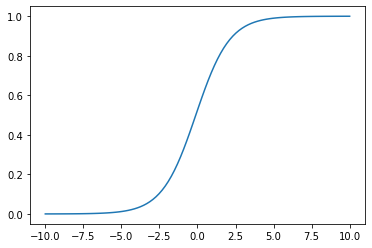

In [5]:
w = 0.9      #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.1      #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

**3D Plot :**

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [8]:
from mpl_toolkits import mplot3d

In [9]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

In [10]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

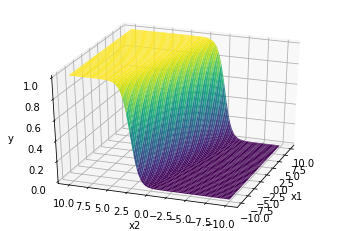

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 200)

**Computing the loss :**

In [12]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

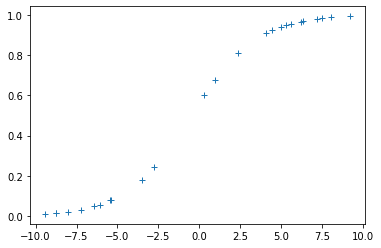

In [13]:
plt.plot(X, Y, '+')
plt.show()

In [14]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [16]:
W = np.linspace(-1, 1, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B)

loss = np.zeros(WW.shape)

In [17]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

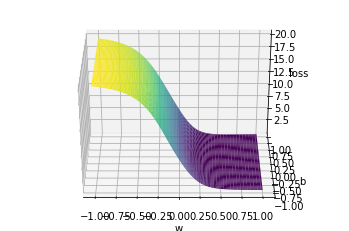

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30, 270)

In [23]:
ij = np.argmin(loss) #gives us the exact location where loss is minimum
i = int(np.floor(ij/loss.shape[1]))
j = int(ij - i*loss.shape[1])

In [24]:
print(i, j)

62 74


In [25]:
print(WW[i, j], BB[i, j])

0.49494949494949503 0.2525252525252526


**Class for Sigmoid Neuron** 

In [29]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True):
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)

      self.w -= learning_rate * dw
      self.b -= learning_rate * db